# **Regresión lineal simple**

**Docente:** PhD Jorge Rudas

**Aprendizaje de Máquina - 2025 I**

**INFOTEP**

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
!pip install folium
import folium
import seaborn as sns
import matplotlib.pyplot as plt

Defaulting to user installation because normal site-packages is not writeable


In [9]:
# Se carga dataset de ejemplo --> Leer documentación para comprender signifiado de cada columna
# https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html

df = pd.read_csv('../Datasets/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


## **Geolocalización de nuestros datos**


In [10]:
# Se seleccionan 100 registros al azar (por practicidad en la visualizacion en el mapa)
df_subset = df.sample(100)

# Mapa centrado en California
california_map = folium.Map(location=[36.7783, -119.4179], zoom_start=6)

# Se agregan los puntos de latitud y longitud al mapa
for index, row in df_subset.iterrows():
    folium.Marker([row['latitude'], row['longitude']]).add_to(california_map)

# Mostrar el mapa
california_map

## **Análisis bivariados**

Hacer un análisis bivariado antes de una regresión lineal es muy importante porque te permite explorar la relación entre dos variables (una dependiente y una independiente) antes de construir un modelo.

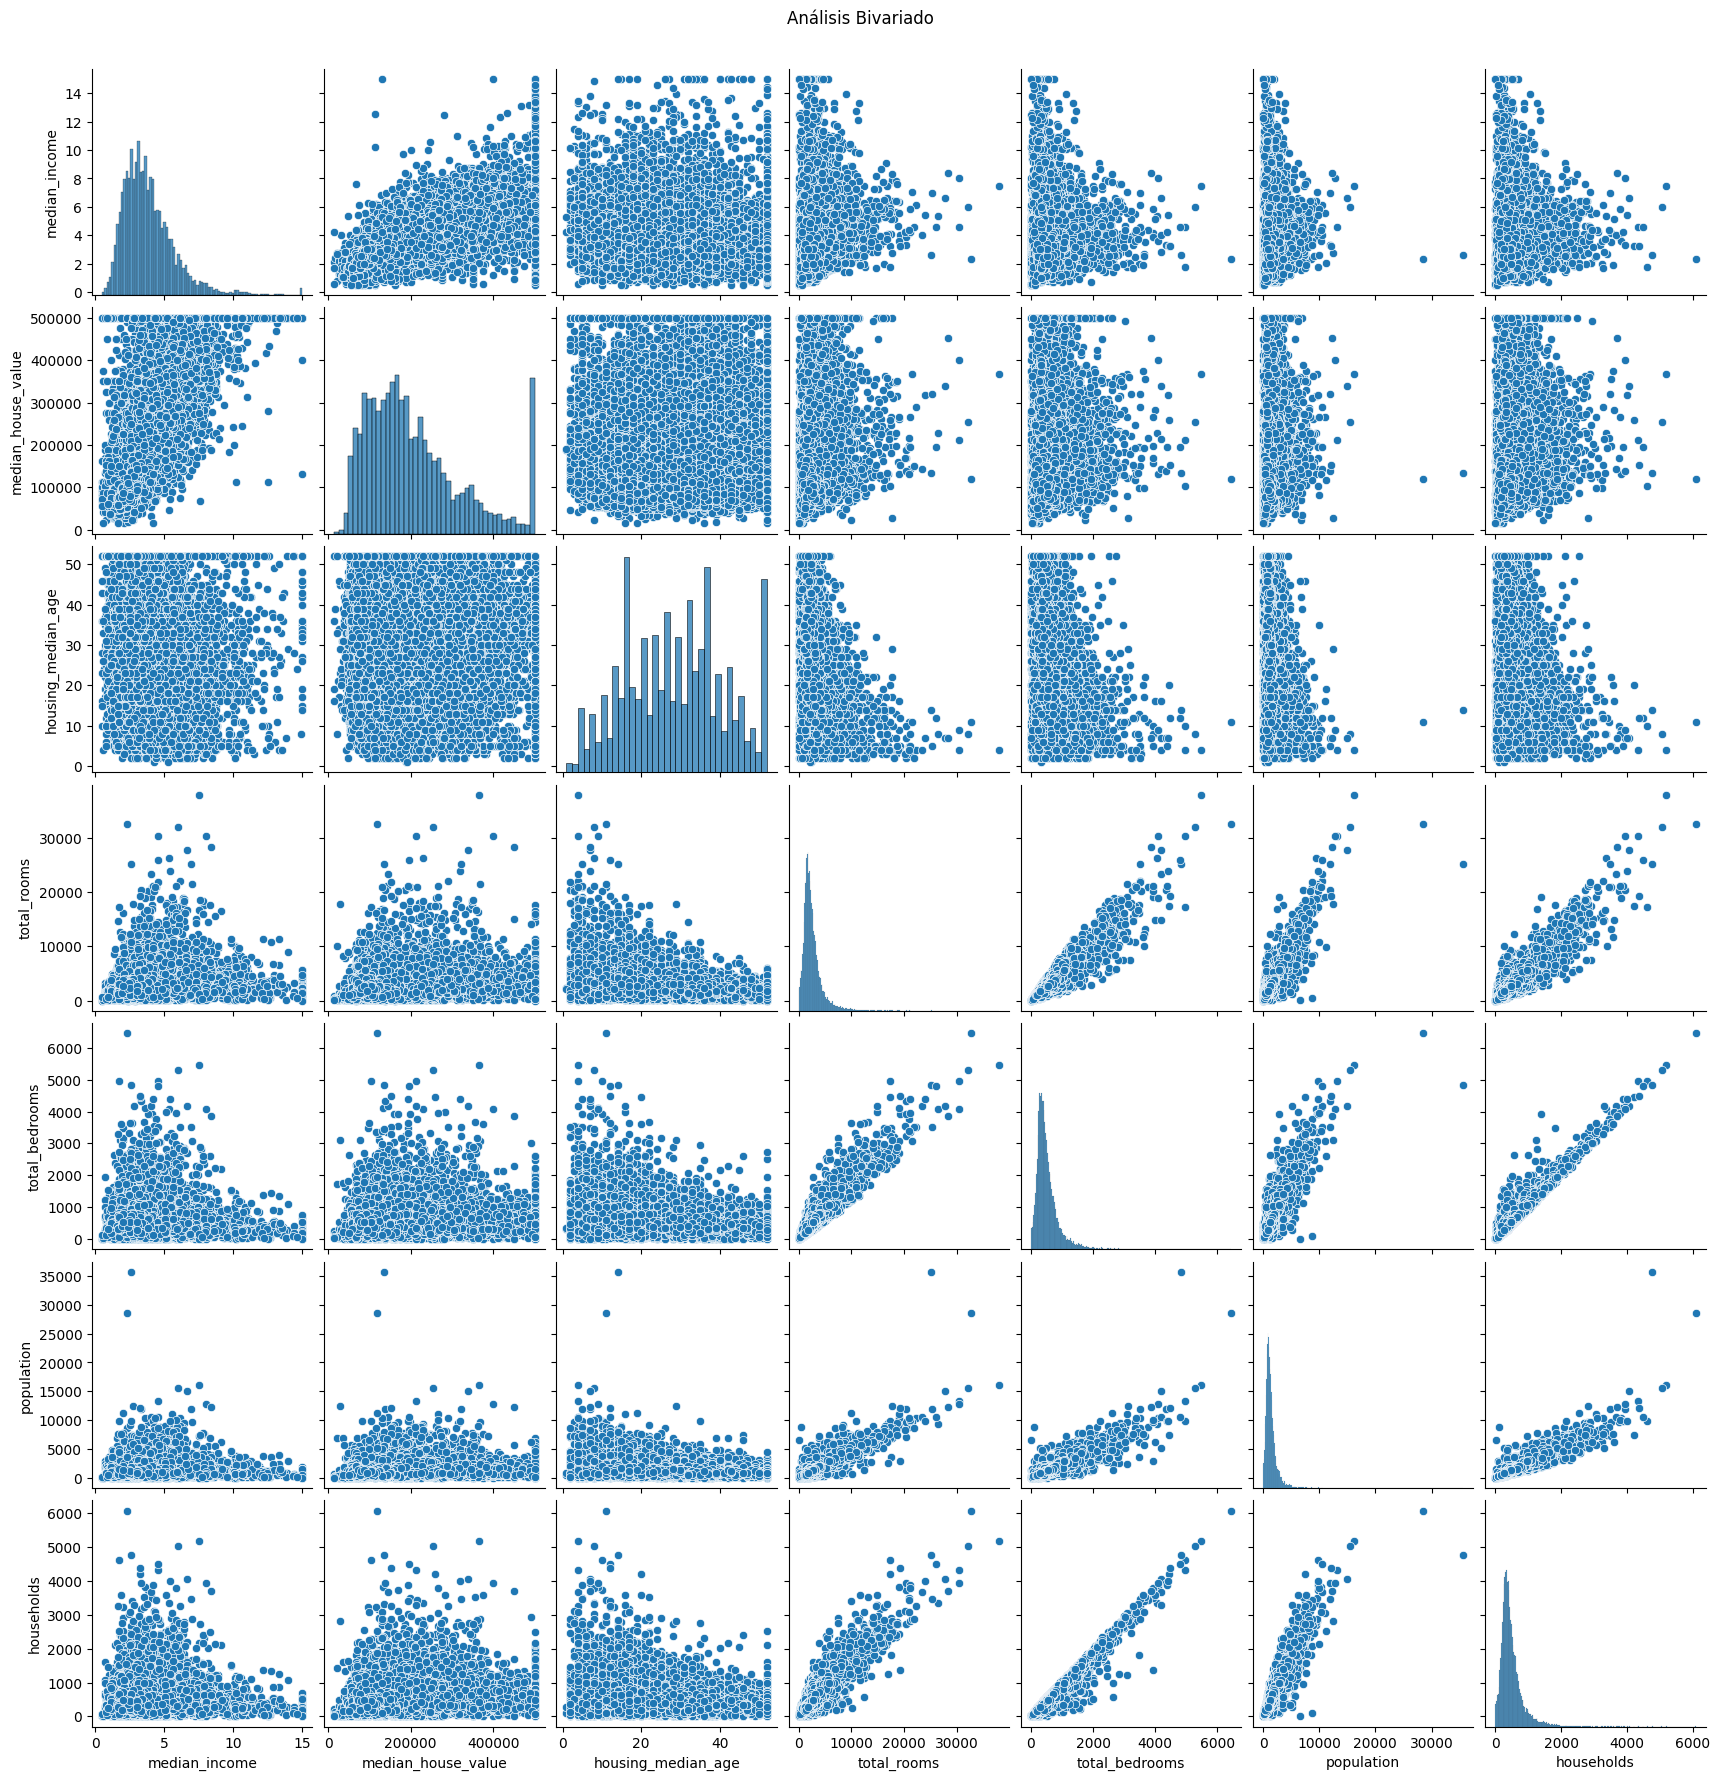

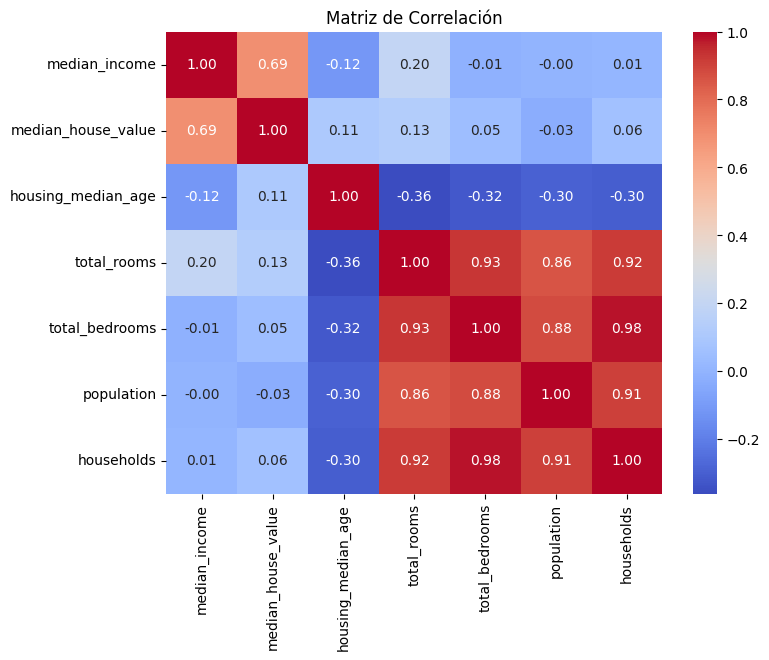

In [11]:
# Columnas para el análisis bivariado
columns_for_bivariate_analysis = ['median_income', 'median_house_value', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households']

# Gráficos de dispersión para pares de columnas seleccionadas
sns.pairplot(df[columns_for_bivariate_analysis])
plt.suptitle('Análisis Bivariado', y=1.02)
plt.show()

# Matriz de correlación
correlation_matrix = df[columns_for_bivariate_analysis].corr()

# Visualizar la matriz de correlación con un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación')
plt.show()

In [12]:
# Variables predictoras (X) y la variable objetivo (y)
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

# Split de los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

# Instancia del modelo de regresión lineal
model = LinearRegression()

# Se entrena el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Predicciones con los datos de prueba
y_pred = model.predict(X_test)

# Rendimiento del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

print('-----------------------------')
# Se imprimen las caracteristicas y sus respectivos coeficientes
for col, coef in zip(X.columns, model.coef_):
  print(f'{col}: {coef}')

print('-----------------------------')
print(f'Intercepto: {model.intercept_}')

Mean Squared Error: 4846957604.736563
R-squared: 0.645108221947274
-----------------------------
longitude: -42345.27901442651
latitude: -42164.188528769664
housing_median_age: 1130.7602751262607
total_rooms: -8.52636858335245
total_bedrooms: 101.98762767352582
population: -28.58782484358744
households: 35.7996965775792
median_income: 40261.7965117616
-----------------------------
Intercepto: -3552977.136878935


# **Actividad en clase**

Hagamos lo mismo pero con dos conjuntos de ejemplo:

* salarios.csv (2 puntos)
* calificaciones.csv (3 puntos)

1.   Cada grupo deberá evaluar los datasets compartidos
2.   Deberán análizar los datos y comprender su significado
3.   Cada grupo deberá realizar un analisis exploratorio de sus datos (análisis univariado y bivariado)
4.   Posteriormente deberán preprocesar sus datos si lo consideran necesario, justificando cada decisión.
5.   Deberán seleccionar una variable independiente y entrenar un modelo de regresión lineal, simplemente utilizando la implementación de este JupyterNotebook.
6.   Evalue el rendimiento de cada modelo, discuta y genere conclusiones sobre este mismo documento.
7.   Enviar el Jupyter de cada grupo antes se finalizar la clase.


